# **Time analysis of PM2.5 data**

The present notebook aims to analyze the PM2.5 data from the AgrImOnIA project to determine the time division to execute parallel models. The data is available in the `data/AgrImOnIA/raw/Agrimonia_Dataset_v_3_0_0.csv` file.

The data is recorded by stations throughout Lombardy and it's near regions. The data is recorded every hour and it's available from 2016-01-01 to 2019-12-31.

## **Station locations**

The following map shows the location of the stations that recorded the PM2.5 data.

![image.png](../docs/images/stations.png)

In [4]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# Load the data
stations_data = pd.read_csv('../data/AgrImOnIA/raw/Agrimonia_Dataset_v_3_0_0.csv')

# We are only inerested in the IDStations, Time, and AQ_pm25
stations_data = stations_data[['IDStations', 'Time', 'AQ_pm25']]

# Cast PM25 to numeric
stations_data['AQ_pm25'] = pd.to_numeric(stations_data['AQ_pm25'], errors='coerce')

# Cast Time to datetime
stations_data['Time'] = pd.to_datetime(stations_data['Time'])

C:\Users\camil\AppData\Local\Temp\ipykernel_13112\66338916.py:2: DtypeWarning: Columns (0,35,36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  stations_data = pd.read_csv('../data/AgrImOnIA/raw/Agrimonia_Dataset_v_3_0_0.csv')


## **PM2.5 in 10 random different stations**

In [40]:
# Filter the data by 10 random stations
random_stations = np.random.choice(stations_data['IDStations'], 10)
stations_data_10 = stations_data.loc[stations_data['IDStations'].isin(random_stations)]

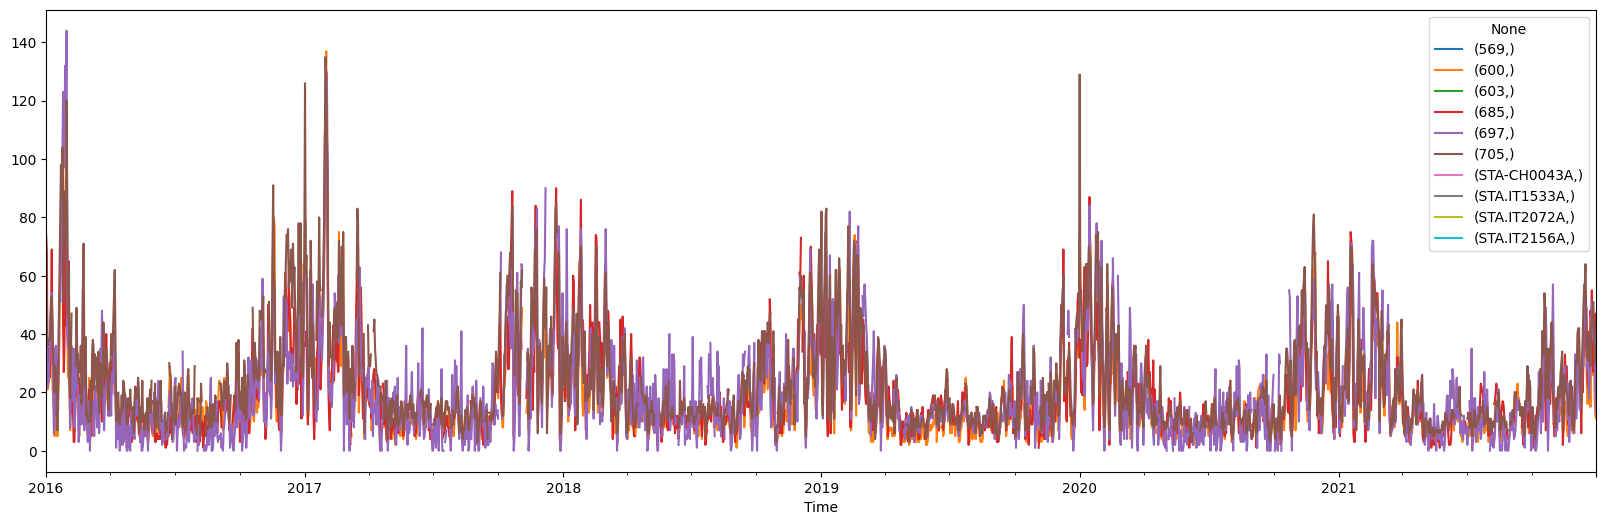

In [41]:
# Plot the data
fig, ax = plt.subplots(figsize=(20, 6))
for key, grp in stations_data_10.groupby(['IDStations']):
    ax = grp.plot(ax=ax, kind='line', x='Time', y='AQ_pm25', label=key)
plt.show()

## **Average between all stations**

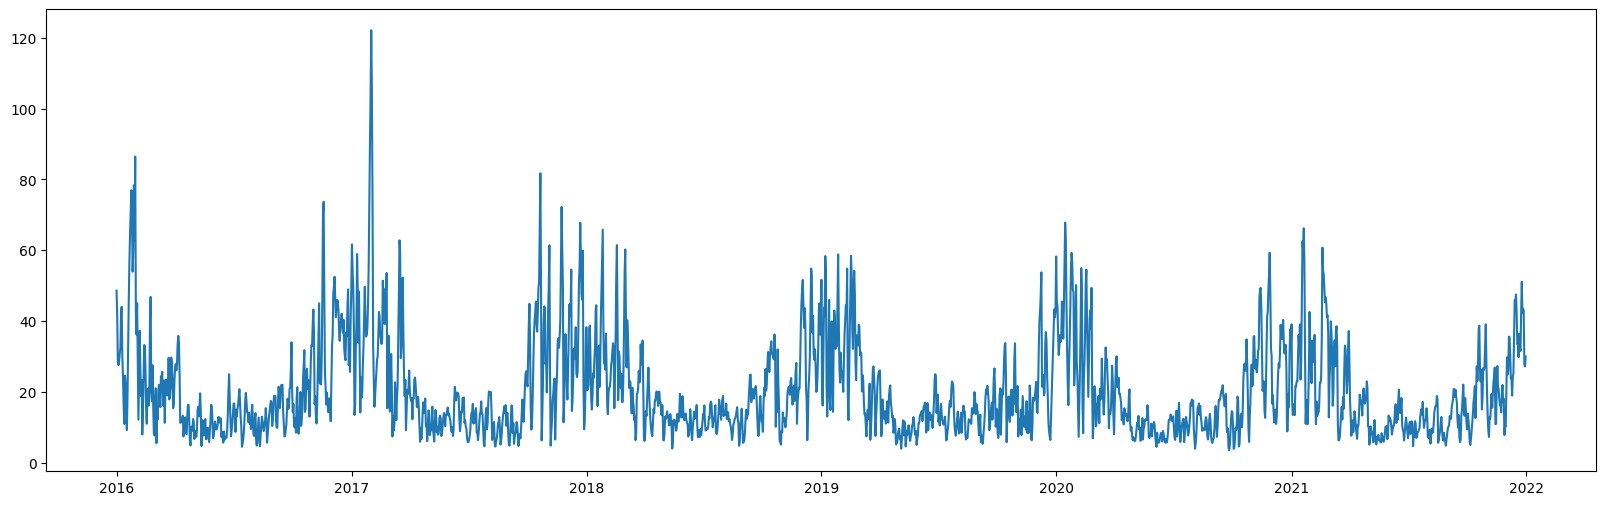

In [42]:
# Drop NaN values
stations_data_avg = stations_data.dropna()

# Drop the IDStations column
stations_data_avg = stations_data_avg.drop(columns=['IDStations'])

# Get the average PM25 of all stations for each day
stations_data_avg = stations_data_avg.groupby(['Time']).mean()

# Plot the data
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(stations_data_avg.index, stations_data_avg['AQ_pm25'])
plt.show()

In [55]:
# Let's put in the plot the seasons of the year (Spring, Summer, Autumn, Winter)
# We will use the following dates:
# Spring: March - June
# Summer: June - September
# Autumn: September - December
# Winter: December - March 

# Add a new column to the dataframe with the season
def get_season(date):
    if date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    elif date.month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'
    
stations_data_avg['Season'] = stations_data_avg.index.map(get_season)

C:\Users\camil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


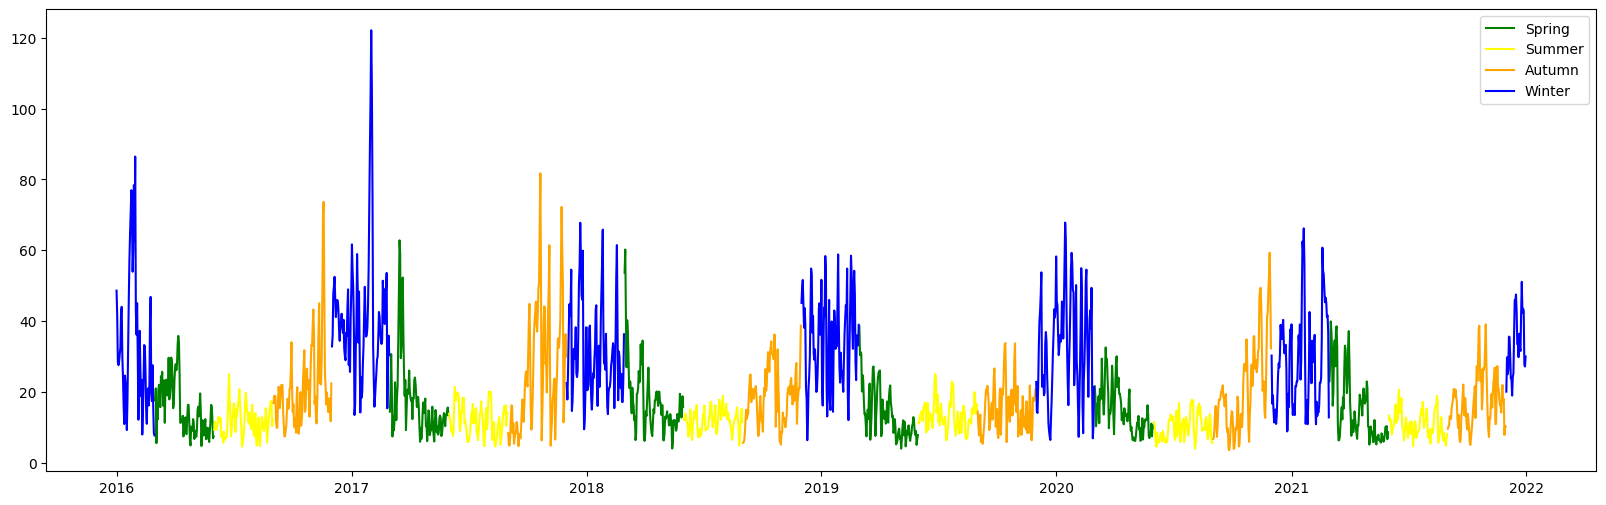

In [54]:
# Plot the data with seaons color
season_colors = {'Spring': 'green', 'Summer': 'yellow', 'Autumn': 'orange', 'Winter': 'blue'}

fig, ax = plt.subplots(figsize=(20, 6))

# Loop through each season and plot the data with the corresponding color
for season, color in season_colors.items():
    data = stations_data_avg[stations_data_avg['Season'] == season]
    # Break data into continuous chunks
    chunks = np.split(data, np.where(np.diff(data.index) != pd.Timedelta(days=1))[0]+1)
    for chunk in chunks:
        ax.plot(chunk.index, chunk['AQ_pm25'], color=color, label=season)

# Remove duplicate labels in the legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

plt.show()

In [ ]:
# Ensure 'Time' column is in datetime format and set as index
stations_data_avg.index = pd.to_datetime(stations_data_avg.index)

season_colors = {'Spring': 'green', 'Summer': 'yellow', 'Autumn': 'orange', 'Winter': 'blue'}

fig, ax = plt.subplots(figsize=(20, 6))

# Loop through each season and plot the data with the corresponding color
for season, color in season_colors.items():
    data = stations_data_avg[stations_data_avg['Season'] == season]
    for year in data.index.year.unique():
        yearly_data = data[data.index.year == year]
        # Ensure data is sorted by date before plotting
        yearly_data = yearly_data.sort_index()
        ax.plot(yearly_data.index, yearly_data['AQ_pm25'], color=color)

plt.show()

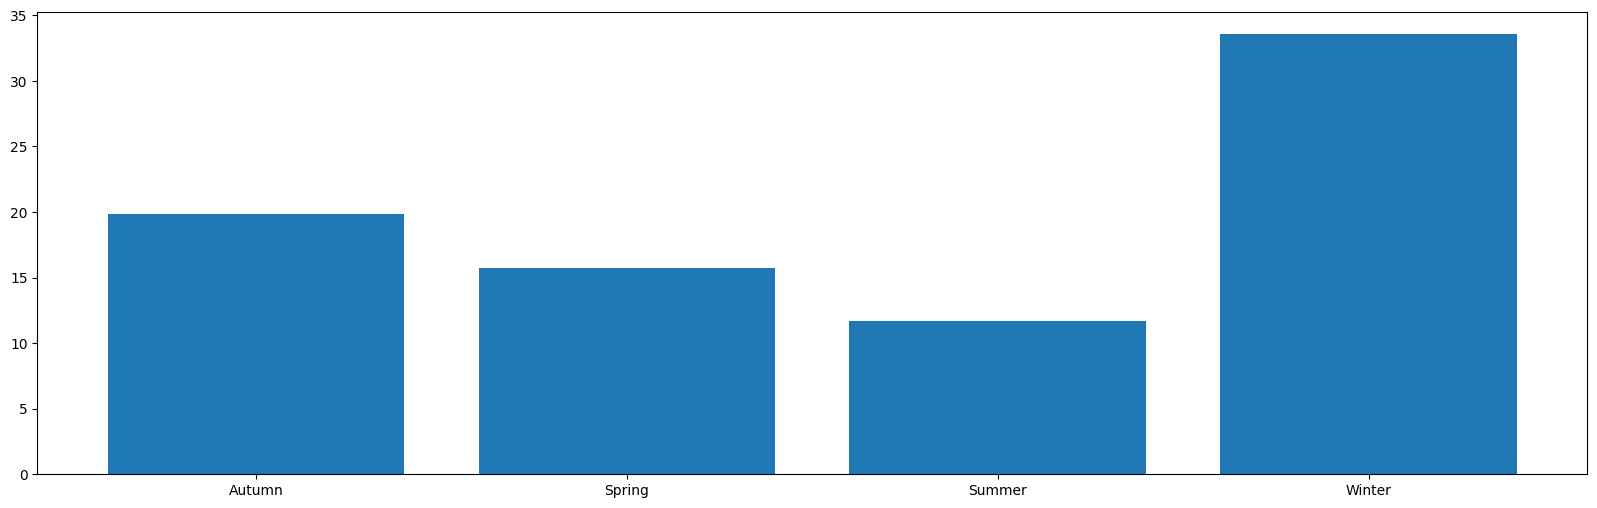

In [45]:
# Average by season
stations_data_avg_season = stations_data_avg.groupby(['Season']).mean()

# Plot the data
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(stations_data_avg_season.index, stations_data_avg_season['AQ_pm25'])
plt.show()

In [56]:
# Overall mean of PM25
overall_mean = stations_data_avg['AQ_pm25'].mean()
print(f'Overall mean of PM25: {overall_mean}')

Overall mean of PM25: 20.143331756283185


C:\Users\camil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


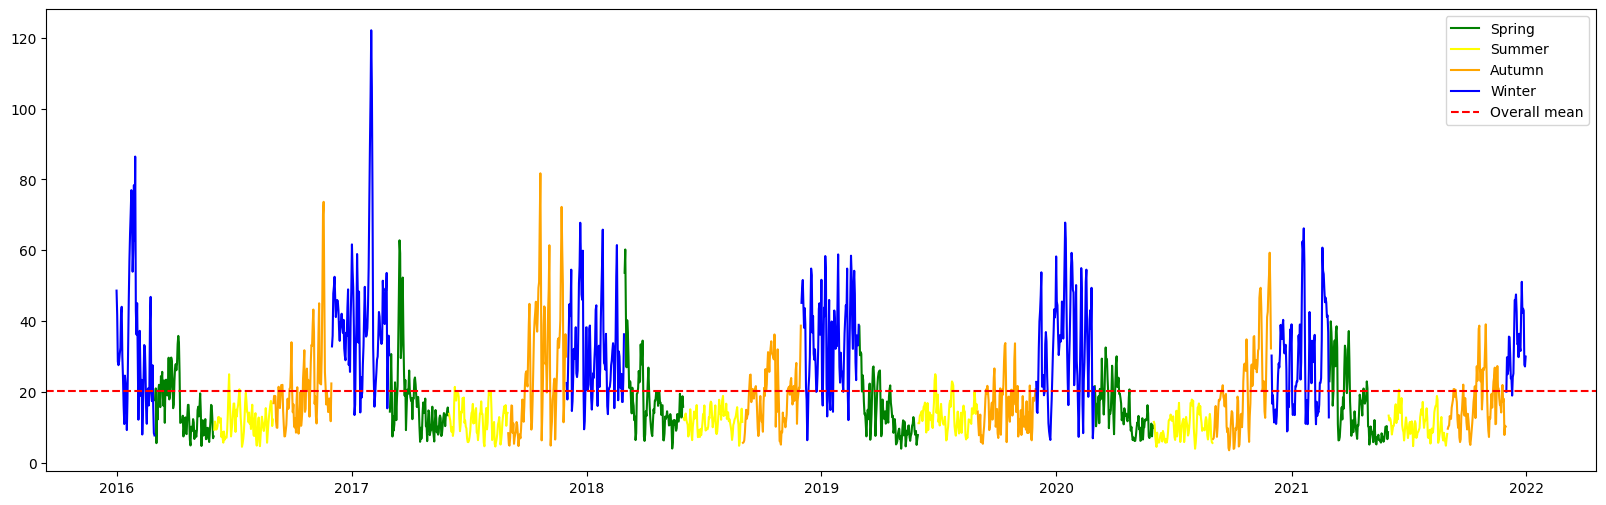

In [57]:
# Plot with line of the overall mean
fig, ax = plt.subplots(figsize=(20, 6))

# Loop through each season and plot the data with the corresponding color
for season, color in season_colors.items():
    data = stations_data_avg[stations_data_avg['Season'] == season]
    # Break data into continuous chunks
    chunks = np.split(data, np.where(np.diff(data.index) != pd.Timedelta(days=1))[0]+1)
    for chunk in chunks:
        ax.plot(chunk.index, chunk['AQ_pm25'], color=color, label=season)
# Plot the overall mean
ax.axhline(y=overall_mean, color='r', linestyle='--', label='Overall mean')

# Remove duplicate labels in the legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

plt.show()

## **Propousal**

I would devide by taking all the seasons per part:
1. start data - November 2016
2. December 2016 - November 2017
3. December 2017 - November 2018
4. December 2018 - November 2019
5. December 2019 - November 2020
6. December 2020 - November 2021 (We can avoid this one do to pandemic reasons)
7. December 2021 - November 2022


### **New idea**

What if one uses the whole dataset, another just the high season (2018) (half of autumn, winter, half of spring), another the low season (2018) (half of spring, summer, half of autum) and another one year?

Since we actually need 6 parts and here are just 4, I would consider adding two parts more for checking, like, another year (2017) for the whole year, other for high and other for low season.

> Now there are more than 6 😅